In [1]:
import pandas as pd
import numpy as np
import os
import time
from keras.models import Sequential, Model
from keras.layers import Conv1D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
import mlflow

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/abdulliaqat/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
cwd = os.getcwd()
path = cwd[0:len(cwd)-(len(cwd.split("/")[-1])+len(cwd.split("/")[-2])+1)] + "data/realAdExchange"

In [3]:
df = pd.read_csv(path+"/exchange-2_cpm_results.csv")
df.head()

,timestamp,value
0,2011-07-01 00:00:01,0.401048
1,2011-07-01 01:00:01,0.392719
2,2011-07-01 02:00:01,0.309996
3,2011-07-01 03:00:01,0.212939
4,2011-07-01 04:00:01,0.205801


In [4]:
df.timestamp = pd.to_datetime(df.timestamp)
df.index = df.timestamp

In [7]:
nb_features = 1
window_size = 10
model = Sequential()
model.add(Conv1D(nb_filter=5, kernel_size=10, input_shape=(window_size, nb_features), activation='relu'))
model.add(Flatten())
#model.add(Dropout(0.4))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(loss='mse', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 5)              55        
_________________________________________________________________
flatten_1 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=10, input_shape=(10, 1), activation="relu", filters=5)`
  after removing the cwd from sys.path.


/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


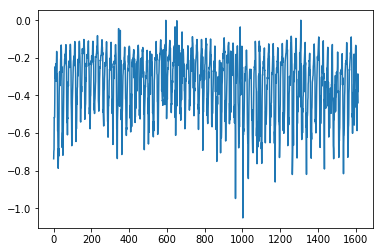

In [12]:
nb_epoch = 25
error_prediction = []
for i in np.arange(11,len(df)):
    #i = 11
    L = 10 #window size
    X_input = df["value"].values[i-(1+L):i-1].reshape((1,10,1))
    Y_input = df["value"].values[i].reshape((1,1))
    history = model.fit(X_input,Y_input , nb_epoch=nb_epoch, verbose=0)
    error_prediction.append((model.predict(X_input)-Y_input)[0][0])
mlflow.log_param('nb_epoch',nb_epoch)
mlflow.log_metric('prediction_error',sum(error_prediction))
plt.plot(error_prediction)
plt.show()

In [107]:
i = 12
L = 10 #window size
X_input = df["value"].values[i-(1+L):i-1].reshape((1,10,1))
Y_input = df["value"].values[i].reshape((1,1))
history = model.fit(X_input,Y_input , nb_epoch=5)
model.predict(X_input)-Y_input

Epoch 1/5
1/1 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 0.0164
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 0.0178


/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


array([[-0.13169789]])

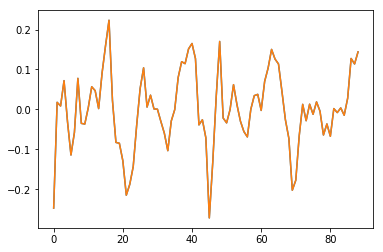